<h1> <b>Project 1</b> </h1>
<p>Artificial Neural Networks: Hand-Written Digits <br/> </p>
<p>Implemented using Tensorflow with MNIST Datasets</p>


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2108 - accuracy: 0.9365
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9881
Epoch 6/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9902
 99% acc reached
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9902


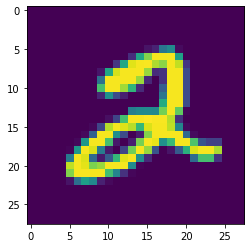

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#to avoid overfitting
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>0.99):
        print("\n 99% acc reached")
        self.model.stop_training = True


mnist = tf.keras.datasets.mnist

#Load MNIST Handwritten datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Normalize
x_train = x_train / 255
x_test = x_test / 255

#input example
plt.imshow(x_train[5])

'''
Model:
Input -> Linear -> Relu -> Linear -> Relu -> Linear -> Softmax
Input : 28 images (one batch)
Layer-1 Unit : 256 Units
Layer-2 Unit : 128 Units
Layer-3 Unit : 10 Units
Loss Function : Cross Entropy
Optimization Algorithm : Adam
Based on Accuracy
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    x_train,
    y_train,
    epochs=10,
    callbacks=[CustomCallbacks()]
)



In [3]:
#evaluate the model using test datasets
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0833 - accuracy: 0.9774


[0.08329030126333237, 0.977400004863739]

In [4]:
#predict using test datasets (one batch) - 28 images
prediction = model.predict(x_test)
predictions = prediction.argmax(axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6])